In [20]:
# Code By Muhammad Abdullah Ijaz 
# Imports
from vpython import *
import numpy as np
import math
from scipy import optimize
from numpy import asarray, arange
from matplotlib import pyplot

In [106]:
# Variables User can update

#Projectile
initial_pos = vector(0,0,0)
in_velocity = 100
radius_of_ball = 0.5
mass_of_ball = 2
area_of_ball = pi*radius_of_ball*radius_of_ball
theta = None   # Angle og projectile with respect to y axis
phi = 0 # Angle of projection with respect to z axis

#Enviroment
air_velocity = vector(0,0,0)
air_density = 1.21
air_drag = 0.5

g = -9.8
Gravity = vector(0,g,0)

In [104]:
def funk(theta):
    t = 0
    dt = 0.01
    ball_pos = initial_pos 
    ball_velocity= vector(in_velocity*sin(theta)*sin(phi), in_velocity*cos(theta), in_velocity*cos(phi)*sin(theta))
    while ball_pos.y >=0  or t < 0.5:
        relative_velocity = ball_velocity - air_velocity
        Force = Gravity*mass_of_ball - 0.5*air_drag*air_density*area_of_ball*mag2(relative_velocity)*(relative_velocity).hat
        accel = Force/mass_of_ball
        ball_velocity = ball_velocity + dt*accel
        ball_pos = ball_pos + ball_velocity*dt
        t = t+dt
        if ball_pos.y < 0:
                break
    ball_pos.y = 0
    Range = - mag(ball_pos)
    #print ("Range =" , ball_pos)
    return Range

In [23]:
def dev(theta):
    delta = 0.01*pi
    upper_theta = theta+ delta
    lower_theta = theta- delta
    
    upper_val = funk(upper_theta)
    lower_val = funk(lower_theta)
    
    grad =(upper_val - lower_val)/(2*delta)
    #print("Gradient =", grad)
    return grad

In [108]:
def gradient_descent(tolerence, iterations_limit, learn_rate):
    
    angle_list,dist_list = list(), list()
    angle = 0.2*pi #random.randrange(1,4) *pi/10.0
    if dev(angle)<= 0.1:
        angle =0.3*pi
    for i in range(iterations_limit):
        #print("Rang",func(theta))
        grad = dev(angle)
        delta = learn_rate* grad
        if abs(delta) <= tolerence:
            break
        angle -= delta
        angle_list.append(angle)
        dist = -funk(angle)
        dist_list.append(dist)
        print('>%d f(%s) = %.5f' % (i, angle, dist))
        #print ("Theta, Range = ", theta/pi, -funk(theta, phi, in_velocity))
    return [angle_list,dist_list ,angle]

>0 f(0.9677408604324182) = 23.14375
>1 f(0.9901021582868732) = 23.30237
>2 f(1.009892775875952) = 23.41330
>3 f(1.026418198802081) = 23.51382
>4 f(1.0419333165484164) = 23.57271
>5 f(1.054535882688345) = 23.63586
>6 f(1.0654908991959706) = 23.65447
>7 f(1.0750890317722592) = 23.70078
Optimum Theta =  0.34221146734086955 pi
Maximum Range =  23.700780397184904 m


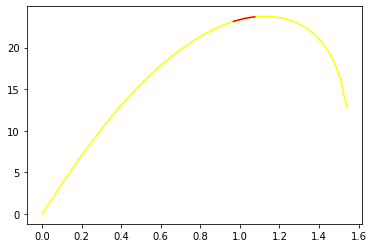

In [109]:
# Theta for maximum range

phi = 0.5*pi
iterations_limit = 1000

#theta_bounds = asarray([[0*pi, 0.5*pi]])

if air_drag == 0:
    tolerence = 0.001  # 00
    learn_rate = 0.00004

if air_drag == 0.5:
    tolerence = 0.009
    learn_rate =  0.003
    
angle_list,dist_list, optimum = gradient_descent(tolerence, iterations_limit, learn_rate)

input_angle, ouput_dist =  list(), list()
for i in range(50):
    angle = i*pi/100.0
    input_angle.append(angle)
    ouput_dist.append(-funk(angle))


pyplot.plot(input_angle, ouput_dist, color = 'yellow')
pyplot.plot(angle_list,dist_list, color ='red')

print("Optimum Theta = ", optimum/pi, "pi")
print("Maximum Range = ", -funk(optimum), "m")

In [110]:
#Scipy
inital = np.array([0.2*pi])
optimum = optimize.minimize(funk, inital, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
print( optimum)
#print("Optimum Theta = ", op_theta/pi, "pi")

      fun: -23.75346993700863
 hess_inv: array([[0.04168444]])
      jac: array([-8.4425807])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 109
      nit: 4
     njev: 51
   status: 2
  success: False
        x: array([1.11976172])
